# Universidad de Costa Rica

### Facultad de Ingeniería

### Escuela de Ingeniería Eléctrica

#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

#### Sebastián Gómez Chaves; B42866
#### Grupo 02

# Tarea 4

In [44]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
from scipy import integrate
import matplotlib.pyplot as plt

#Lectura de archivo "bits10k.csv"
bits = np.array(pd.read_csv("bits10k.csv",header=None)) 

# Número de bits
N = len(bits)

 1. Crear un esquema de modulación BPSK para los bits presentados.

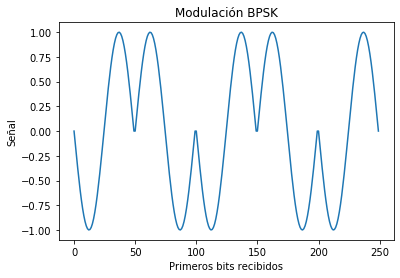

In [159]:
# Frecuencia de la portadora
f = 5000 # Hz

# Duración del período de cada símbolo (onda)
T = 1/f 

# Número de puntos de muestreo por período
p = 50

# Puntos de muestreo para cada período
tp = np.linspace(0, T, p)

# Creación de la forma de onda de la portadora
sinus = np.sin(2*np.pi * f * tp)

# Visualización de la forma de onda de la portadora
#plt.plot(tp, sinus)
#plt.xlabel('Tiempo / s')
#plt.show()

# Frecuencia de muestreo
fs = p/T # Hz

# Creación de la línea temporal para toda la señal Tx
t = np.linspace(0, N*T, N*p)

# Inicializar el vector de la señal modulada Tx
senal = np.zeros(t.shape)

# Creación de la señal modulada BPSK
for k, b in enumerate(bits):
    if b==1:
        senal[k*p:(k+1)*p] = sinus
    else:
        senal[k*p:(k+1)*p] = -sinus

# Visualización de los primeros bits modulados
pb = 5
plt.plot(senal[0:pb*p])
plt.title('Modulación BPSK')
plt.ylabel('Señal')
plt.xlabel('Primeros bits recibidos')
plt.show()

2. Calcular la potencia promedio de la señal modulada generada

In [67]:
# Potencia instantánea
Pinst = senal**2

# Potencia promedio a partir de la potencia instantánea (W)
Ps = integrate.trapz(Pinst, t) / (N * T)
print(Ps)

0.4900009800019598


3. Simular un canal ruidoso del tipo AWGN (ruido aditivo blanco gaussiano) con una relación señal a ruido (SNR) desde -2 hasta 3 dB

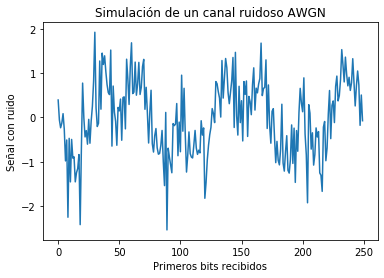

In [160]:
# Relación señal-a-ruido deseada
SNR = 3

# Potencia del ruido para SNR y potencia de la señal dadas
Pn = Ps / (10**(SNR / 10))

# Desviación estándar del ruido
sigma = np.sqrt(Pn)
#print(sigma)

# Crear ruido (Pn = sigma^2)
ruido = np.random.normal(0, sigma, senal.shape)

# Simular "el canal": señal recibida
Rx = senal + ruido
#print(Rx)

# Visualización de los primeros bits recibidos
pb = 5
plt.figure()
plt.plot(Rx[0:pb*p])
plt.title('Simulación de un canal ruidoso AWGN')
plt.ylabel('Señal con ruido')
plt.xlabel('Primeros bits recibidos')
plt.show()

4. Graficar la densidad espectral de potencia de la señal con el método de Welch (SciPy), antes y después del canal ruidoso

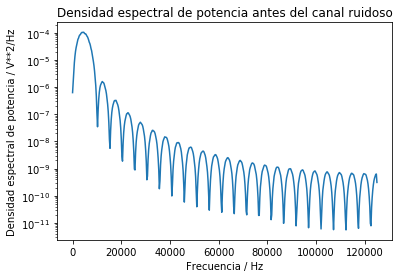

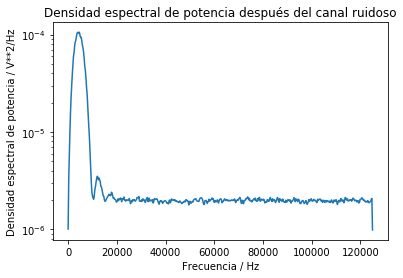

In [161]:
# Antes del canal ruidoso
fw, PSD = signal.welch(senal, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia antes del canal ruidoso')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.show()

# Después del canal ruidoso
fw, PSD = signal.welch(Rx, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia después del canal ruidoso')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.show()

5. Demodular y decodificar la señal y hacer un conteo de la tasa de error de bits (BER, bit error rate) para cada nivel SNR.

In [163]:
#Vector de valores de SNR
SNR1= np.linspace(-2,3,6)

#Pseudo-energía de la onda original (esta es suma, no integral)
Es = np.sum(sinus**2)

#Vector de BER
BER1=np.zeros(SNR1.shape)

#Vector de errores
err1=np.zeros(SNR1.shape)

for j in range(len(SNR1)):
    Pn1 = Ps / (10**(SNR1[j] / 10))
    # Desviación estándar del ruido
    sigma1 = np.sqrt(Pn1)
    # Crear ruido (Pn = sigma^2)
    ruido1 = np.random.normal(0, sigma1, senal.shape)
    # Simular "el canal": señal recibida
    Rx1 = senal + ruido1
    # Inicialización del vector de bits recibidos
    bitsRx = np.zeros(bits.shape)

# Decodificación de la señal por detección de energía
    for k, b in enumerate(bits):
        Ep1 = np.sum(Rx1[k*p:(k+1)*p] * sinus)
        if Ep1 > Es/2:
            bitsRx[k] = 1
        else:
            bitsRx[k] = 0
    err1[j] = np.sum(np.abs(bits - bitsRx))
    BER1[j] = err1[j]/N
    print('Hay un total de {} errores en {} bits, con SNR {} dB, para una tasa de error de {}.'.format(err1[j], N, SNR1[j], BER1[j]))


Hay un total de 11.0 errores en 10000 bits, con SNR -2.0 dB, para una tasa de error de 0.0011.
Hay un total de 6.0 errores en 10000 bits, con SNR -1.0 dB, para una tasa de error de 0.0006.
Hay un total de 2.0 errores en 10000 bits, con SNR 0.0 dB, para una tasa de error de 0.0002.
Hay un total de 0.0 errores en 10000 bits, con SNR 1.0 dB, para una tasa de error de 0.0.
Hay un total de 0.0 errores en 10000 bits, con SNR 2.0 dB, para una tasa de error de 0.0.
Hay un total de 0.0 errores en 10000 bits, con SNR 3.0 dB, para una tasa de error de 0.0.


6. Graficar BER versus SNR.

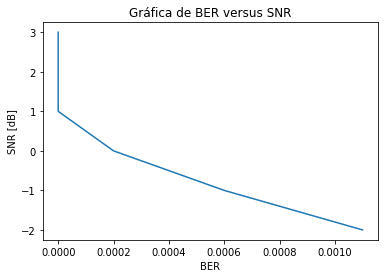

In [165]:
plt.figure()
plt.plot(BER1,SNR1)
plt.title('Gráfica de BER versus SNR')
plt.xlabel('BER')
plt.ylabel('SNR [dB]')
plt.show()